In [4]:
# Standard libraries
import numpy as np
import pandas as pd
import re

# Third-party libraries
import scanpy as sc
import matplotlib.pyplot as plt
from sklearn.metrics import (
    precision_recall_curve,
    roc_auc_score,
    auc
)

# Local modules
from cna_inferer.aggregation import sliding_window_aggregate
from cna_inferer.segmentation import call_cnas
from cna_inferer.main import process_and_call_cnas


C:\Users\12039\AppData\Local\Temp\ipykernel_62424\3689238874.py:15: FutureWarning: The specified parameters ('target_sum',) are no longer positional. Please specify them like `target_sum=10000.0`
  sc.pp.normalize_total(ad, 1e4)


✅ Processed 0 cells...
✅ Processed 500 cells...
✅ Processed 1000 cells...
✅ Processed 1500 cells...
✅ Processed 2000 cells...
✅ Processed 2500 cells...
✅ Processed 3000 cells...
✅ Processed 3500 cells...
✅ Processed 4000 cells...
✅ Processed 4500 cells...
✅ Processed 5000 cells...
✅ Processed 5500 cells...
✅ Processed 6000 cells...
✅ Processed 6500 cells...
✅ Processed 7000 cells...
✅ Processed 7500 cells...
✅ Processed 8000 cells...
✅ Processed 8500 cells...
✅ Processed 9000 cells...
✅ Processed 9500 cells...
✅ Processed 10000 cells...


C:\Users\12039\AppData\Local\Temp\ipykernel_62424\3689238874.py:15: FutureWarning: The specified parameters ('target_sum',) are no longer positional. Please specify them like `target_sum=10000.0`
  sc.pp.normalize_total(ad, 1e4)


✅ Processed 0 cells...
✅ Processed 500 cells...
✅ Processed 1000 cells...
✅ Processed 1500 cells...
✅ Processed 2000 cells...
✅ Processed 2500 cells...
✅ Processed 3000 cells...
✅ Processed 3500 cells...
✅ Processed 4000 cells...
✅ Processed 4500 cells...
✅ Processed 5000 cells...
✅ Processed 5500 cells...
✅ Processed 6000 cells...
✅ Processed 6500 cells...
✅ Processed 7000 cells...
✅ Processed 7500 cells...
✅ Processed 8000 cells...
✅ Processed 8500 cells...
✅ Processed 9000 cells...
✅ Processed 9500 cells...
✅ Processed 10000 cells...


C:\Users\12039\AppData\Local\Temp\ipykernel_62424\3689238874.py:15: FutureWarning: The specified parameters ('target_sum',) are no longer positional. Please specify them like `target_sum=10000.0`
  sc.pp.normalize_total(ad, 1e4)


✅ Processed 0 cells...
✅ Processed 500 cells...
✅ Processed 1000 cells...
✅ Processed 1500 cells...
✅ Processed 2000 cells...
✅ Processed 2500 cells...
✅ Processed 3000 cells...
✅ Processed 3500 cells...
✅ Processed 4000 cells...
✅ Processed 4500 cells...
✅ Processed 5000 cells...
✅ Processed 5500 cells...
✅ Processed 6000 cells...
✅ Processed 6500 cells...
✅ Processed 7000 cells...
✅ Processed 7500 cells...
✅ Processed 8000 cells...
✅ Processed 8500 cells...
✅ Processed 9000 cells...
✅ Processed 9500 cells...
✅ Processed 10000 cells...


C:\Users\12039\AppData\Local\Temp\ipykernel_62424\3689238874.py:15: FutureWarning: The specified parameters ('target_sum',) are no longer positional. Please specify them like `target_sum=10000.0`
  sc.pp.normalize_total(ad, 1e4)


✅ Processed 0 cells...
✅ Processed 500 cells...
✅ Processed 1000 cells...
✅ Processed 1500 cells...
✅ Processed 2000 cells...
✅ Processed 2500 cells...
✅ Processed 3000 cells...
✅ Processed 3500 cells...
✅ Processed 4000 cells...
✅ Processed 4500 cells...
✅ Processed 5000 cells...
✅ Processed 5500 cells...
✅ Processed 6000 cells...
✅ Processed 6500 cells...
✅ Processed 7000 cells...
✅ Processed 7500 cells...
✅ Processed 8000 cells...
✅ Processed 8500 cells...
✅ Processed 9000 cells...
✅ Processed 9500 cells...
✅ Processed 10000 cells...


C:\Users\12039\AppData\Local\Temp\ipykernel_62424\3689238874.py:15: FutureWarning: The specified parameters ('target_sum',) are no longer positional. Please specify them like `target_sum=10000.0`
  sc.pp.normalize_total(ad, 1e4)


✅ Processed 0 cells...
✅ Processed 500 cells...
✅ Processed 1000 cells...
✅ Processed 1500 cells...
✅ Processed 2000 cells...
✅ Processed 2500 cells...
✅ Processed 3000 cells...
✅ Processed 3500 cells...
✅ Processed 4000 cells...
✅ Processed 4500 cells...
✅ Processed 5000 cells...
✅ Processed 5500 cells...
✅ Processed 6000 cells...
✅ Processed 6500 cells...
✅ Processed 7000 cells...
✅ Processed 7500 cells...
✅ Processed 8000 cells...
✅ Processed 8500 cells...
✅ Processed 9000 cells...
✅ Processed 9500 cells...
✅ Processed 10000 cells...
              AUPR     AUROC
fraction                    
1.00      0.001885  0.438219
0.50      0.001918  0.456628
0.20      0.002164  0.509583
0.10      0.002318  0.535605
0.05      0.002408  0.542626


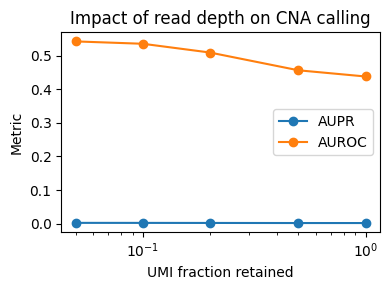

In [5]:
# 1) Load and lightly QC once
adata0 = sc.read_h5ad("PBMC_simulated_cnas_041025.h5ad")
adata0.var_names_make_unique()
sc.pp.filter_cells(adata0, min_counts=500)
sc.pp.filter_genes (adata0, min_cells=3)
adata0.var["chromosome"] = adata0.var["chromosome"].astype(str)
adata0 = adata0[:, adata0.var.sort_values(["chromosome", "start"]).index]

# 2) Helper to run the CNA pipeline on an AnnData
def run_cna_pipeline(ad, fraction, **cna_kwargs):
    """ Downsample, normalize, and call CNAs directly on AnnData. """
    orig = ad.X.sum(1).A1.astype(int)
    targets = np.floor(orig * fraction).astype(int)
    sc.pp.downsample_counts(ad, counts_per_cell=targets)
    sc.pp.normalize_total(ad, 1e4)
    sc.pp.log1p(ad)
    return call_cnas(ad, **cna_kwargs)

# 3) Loop over depths
fractions = [1.0, 0.5, 0.2, 0.1, 0.05]
results = []
for frac in fractions:
    # copy raw @ whole depth
    ad = adata0.copy()
    # process & call
    ad = run_cna_pipeline(
        ad, frac,
        window_size=100, z_thresh=2, min_bins=5, n_bkps=8, model="l2", n_jobs=1
    )
    # build y_true / y_score from the original labels & z‑scores
    # (you already have bin_info in ad.uns and ad.obs["cna_calls"])
    bin_info = ad.uns["bin_info"]
    n_cells, n_bins = ad.n_obs, bin_info.shape[0]

    # ground truth
    y_true = np.zeros((n_cells, n_bins), int)
    for i, label in enumerate(adata0.obs["simulated_cnvs"]):
        if not isinstance(label, str):
            continue

        # split on either “;” or “,” (with optional whitespace) and skip empty parts
        for seg in re.split(r"[;,]\s*", label):
            seg = seg.strip()
            if not seg or ":" not in seg:
                # nothing to unpack or no chromosome:coords present
                continue

            # split only on the first “:”
            chrom, rest = seg.split(":", 1)
            # rest might be "10000-20000 (CN 3)", so take the coords before any space
            coords = rest.split()[0]
            start, end = map(int, coords.split("-", 1))

            # now apply mask as before
            mask = (
                (bin_info["chromosome"] == chrom) &
                (bin_info["start_gene"] >= start) &
                (bin_info["start_gene"] <= end)
            )
            y_true[i, mask.values] = 1

    # score & predict
    Xb = ad.obsm["X_binned"]
    y_score = ((Xb - Xb.mean(1, keepdims=True)) / Xb.std(1, keepdims=True)).ravel()
    y_true_flat = y_true.ravel()

    # metrics
    prec, rec, _ = precision_recall_curve(y_true_flat, y_score)
    aupr = auc(rec, prec)
    auroc = roc_auc_score(y_true_flat, y_score)

    results.append({"fraction": frac, "AUPR": aupr, "AUROC": auroc})

# 4) Summarize & plot
df = pd.DataFrame(results).set_index("fraction")
print(df)

plt.figure(figsize=(4,3))
df.plot(marker='o', logx=True, ax=plt.gca())
plt.xlabel("UMI fraction retained")
plt.ylabel("Metric")
plt.title("Impact of read depth on CNA calling")
plt.tight_layout()
plt.show()
